In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import cycle, islice
import csv 
csvfile = "Zsample10.csv"
zillow_df = pd.read_csv(csvfile)

In [52]:
zillow_df.head()

,parcelid,ac_type,bath,beds,bldg_qual,calc_bath,sqft,calc_sqft,fips,garage,...,regionzip,rooms,units,yearbuilt,tax_structure,tax_total,assessment_yr,tax_land,tax_bill_ayr,tractblk
0,14104290,0,1.5,2,0,1.5,0,1008,6059,2,...,97047,5,0,1965,48367,321014,2016,272647,4125.88,6.059090e+13
1,12170245,0,1.0,2,6,1.0,0,1500,6037,0,...,96265,0,1,1948,134826,674131,2016,539305,8003.98,6.037460e+13
2,17224583,0,3.5,4,0,3.5,1356,3071,6111,2,...,96385,11,0,1977,450356,900712,2016,450356,9497.78,6.111010e+13
3,10920939,0,1.0,3,4,1.0,0,1134,6037,0,...,96375,0,1,1950,116449,487319,2016,370870,5853.33,6.037100e+13
4,14455839,13,2.0,3,0,2.0,0,1410,6059,2,...,96996,6,0,1970,47884,86445,2016,38561,893.48,6.059030e+13


In [53]:
countyLA = zillow_df.loc[zillow_df["fips"] == 6037]
countyOC = zillow_df.loc[zillow_df["fips"] == 6059]
countyVC = zillow_df.loc[zillow_df["fips"] == 6111]

In [54]:
counties = zillow_df.set_index(["fips"])

In [55]:
countiesRenamed = counties.rename({6037: "Los Angeles", 6059: "Orange County", 6111: "Ventura County"})

In [56]:
#countyLAData = countyLA.rename({6037: "Los Angeles"})
losAngelesData = countyLA.set_index(["fips"])
losAngelesDataRenamed = losAngelesData.rename({6037: "Los Angeles"})

In [57]:
orangeCountyData = countyOC.set_index(["fips"])
orangeCountyDataRenamed = orangeCountyData.rename({6059: "Orange County"})

In [58]:
venturaCountyData = countyVC.set_index(["fips"])
venturaCountyDataRenamed = venturaCountyData.rename({6111: "Ventura County"})

In [59]:
averageSquareFeetLA = losAngelesDataRenamed.groupby("fips")["calc_sqft"].mean()

In [60]:
averageSquareFeetOC = orangeCountyDataRenamed.groupby("fips")["calc_sqft"].mean()

In [61]:
averageSquareFeetVC = venturaCountyDataRenamed.groupby("fips")["calc_sqft"].mean()

In [62]:
avgLA = countiesRenamed.groupby("fips")["calc_sqft"].mean()

# Average Square Feet

In [63]:
squareFeet_df = pd.DataFrame({"Average Sq Ft Per County": avgLA})
newSquareFeet_df = squareFeet_df[(squareFeet_df.T !=0).any()]
newSquareFeet_df

,Average Sq Ft Per County
fips,
Los Angeles,1785.172927
Orange County,1851.068749
Ventura County,1829.452139


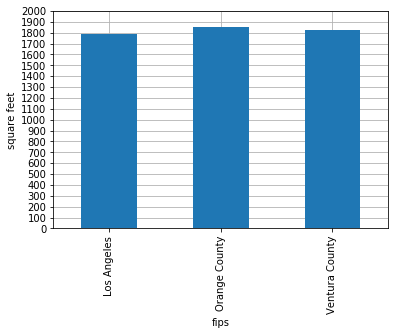

In [64]:
squareFootChart = newSquareFeet_df.plot(kind='bar', zorder=3, yticks=range(0,2018,100), legend=False)
squareFootChart.set_ylabel("square feet")
squareFootChart.grid()
squareFootChart

In [65]:
losAngelesBeds = losAngelesDataRenamed["beds"].mean()

In [66]:
orangeCountyBeds = orangeCountyDataRenamed["beds"].mean()

In [67]:
venturaCountyBeds = venturaCountyDataRenamed["beds"].mean()

In [68]:
avgBedLA = countiesRenamed.groupby("fips")["beds"].mean()

In [69]:
bedrooms_df = pd.DataFrame({"Average Number of Bedrooms per County": avgBedLA})
newBedrooms_df = bedrooms_df[(bedrooms_df.T !=0).any()]
newBedrooms_df

,Average Number of Bedrooms per County
fips,
Los Angeles,3.105097
Orange County,3.064674
Ventura County,3.090588


# Average Number of Bedrooms in Each County

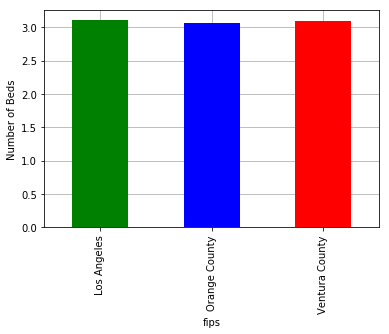

In [70]:
#colors = list(islice(cycle(["r", 'r', "y"]), None, len(newBedrooms_df)))
bedroomChart = newBedrooms_df.plot(kind='bar', legend=False, align='center', zorder=3, color=tuple(["g","b","r"]))
bedroomChart.set_ylabel("Number of Beds")
bedroomChart.grid()

In [71]:
priceLA = losAngelesDataRenamed.groupby("fips")["tax_total"].sum()
sumOfSqFtLA = losAngelesDataRenamed.groupby("fips")["calc_sqft"].sum()
pricePerFtLA = priceLA / sumOfSqFtLA

In [72]:
priceOC = orangeCountyDataRenamed.groupby("fips")["tax_total"].sum()
sumOfSqFtOC = orangeCountyDataRenamed.groupby("fips")["calc_sqft"].sum()
pricePerFtOC = priceOC / sumOfSqFtOC

In [73]:
priceVC = venturaCountyDataRenamed.groupby("fips")["tax_total"].sum()
sumOfSqFtVC = venturaCountyDataRenamed.groupby("fips")["calc_sqft"].sum()
pricePerFtVC = priceVC / sumOfSqFtVC

In [74]:
priceFinal = countiesRenamed.groupby("fips")["calc_sqft"].mean()

In [75]:
price_df = pd.DataFrame({"LA Square Foot Price": priceFinal})
newPrice_df = price_df[(price_df.T !=0).any()]
newPrice_df

,LA Square Foot Price
fips,
Los Angeles,1785.172927
Orange County,1851.068749
Ventura County,1829.452139


# Average Price Per Square Foot

Text(0.5,0,'Price (Per Square Foot)')

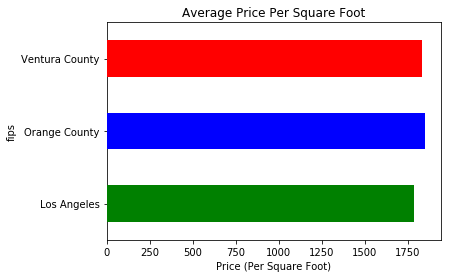

In [82]:
squareFtChart = newPrice_df.plot(kind='barh', legend=False, zorder=3, color=tuple(["g","b","r"]))
plt.title("Average Price Per Square Foot")
plt.xlabel("Price (Per Square Foot)")